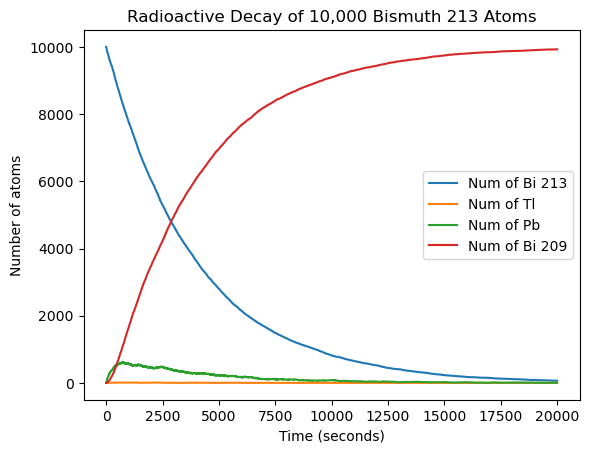

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

#initialize arrays
dt = 1
max_time = int(20_000)
num_Bi_213 = np.zeros(max_time+1)
num_Bi_213[0] = int(10_000)
num_Tl = np.zeros(max_time+1)
num_Pb = np.zeros(max_time+1)
num_Bi_209 = np.zeros(max_time+1)
time = np.arange(0,max_time,dt) #can easily change dt

#calculate rates and weights
rate_Bi_213 = 46*60
p_Bi_213 = 1 - 2**(-1/rate_Bi_213)

rate_Pb = 3.3*60
p_Pb = 1 - 2**(-1/rate_Pb)

rate_Tl = 2.20*60
p_Tl = 1 - 2**(-1/rate_Tl)
weight_Tl = 2.09/100

for i in time:
    # set all values we will add to or subtract from
    num_Pb[i+1] = num_Pb[i]
    num_Tl[i+1] = num_Tl[i]
    num_Bi_213[i+1]= num_Bi_213[i]
    num_Bi_209[i+1]= num_Bi_209[i]
    
    #calculate pb decay
    for q in range(int(num_Pb[i])):
        if random.random() < p_Pb:
            num_Pb[i+1] -= 1
            num_Bi_209[i+1] += 1
    # calculate Tl decay
    for q in range(int(num_Tl[i])):
        if random.random() < p_Tl:
            num_Tl[i+1] -= 1
            num_Pb[i+1] += 1
    # calculate Bi 213 decay
    for q in range(int(num_Bi_213[i])):
        if random.random() < p_Bi_213:
            num_Bi_213[i+1] -= 1
            if random.random() < weight_Tl:
                num_Tl[i+1] +=1
            else:
                num_Pb[i+1] +=1
#another array because my code is midly lazy and rolls over in time         
time_plot = np.arange(0,max_time+1,dt) #can easily change dt

plt.plot(time_plot,num_Bi_213) 
plt.plot(time_plot,num_Tl)
plt.plot(time_plot,num_Pb)
plt.plot(time_plot,num_Bi_209)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of atoms')
plt.legend(['Num of Bi 213','Num of Tl','Num of Pb','Num of Bi 209']);
plt.title('Radioactive Decay of 10,000 Bismuth 213 Atoms')
plt.savefig('radioactive_decay_p3.png')